In [2]:
#data set

#A
a= [0,0,1,1,0,0,
    0,1,0,0,1,0,
    1,1,1,1,1,1,
    1,0,0,0,0,1,
    1,0,0,0,0,1]
#B
b= [0,1,1,1,1,0,
    0,1,0,0,1,0,
    0,1,1,1,1,0,
    0,1,0,0,1,0,
    0,1,1,1,1,0]
#C
c=[0,1,1,1,1,0,
    0,1,0,0,0,0,
    0,1,0,0,0,0,
    0,1,0,0,0,0,
    0,1,1,1,1,0]

In [3]:
#creating labels
y= [[1,0,0],
    [0,1,0],
    [0,0,1]]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Convert Data and labels into numpy arrays
x = [np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)

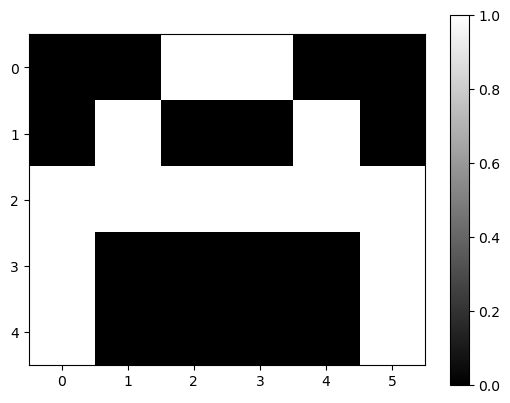

In [6]:
# Visualize the data
plt.imshow(np.array(a).reshape(5, 6), cmap='gray')
plt.colorbar()  # Optional: add a color bar
plt.show()

In [7]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
# Forward propagation
def f_forward(x, w1, w2):
    # Hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    # Output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return a2

In [9]:
# Generate random weights
def generate_wt(x, y):
    return np.random.randn(x, y)

In [10]:
# Define loss function
def loss(out, y):
    s = np.square(out - y)
    s = np.sum(s) / len(y)
    return s

In [11]:
# Backpropagation
def back_prop(x, y, w1, w2, alpha):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    d2 = (a2 - y)
    d1 = np.multiply(w2.dot(d2.transpose()).transpose(), (np.multiply(a1, 1 - a1)))
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    w1 = w1 - (alpha * w1_adj)
    w2 = w2 - (alpha * w2_adj)
    return w1, w2

In [12]:
# Training
def train(x, y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_val = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append(loss(out, y[i]))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        acc.append((1 - (sum(l) / len(x))) * 100)
        loss_val.append(sum(l) / len(x))
        print("Epochs:", j + 1, "acc:", (1 - (sum(l) / len(x))) * 100)
    return acc, loss_val, w1, w2

In [13]:
# Predict function
def predict(x, w1, w2):
    out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(out[0])):
        if maxm < out[0][i]:
            maxm = out[0][i]
            k = i
    if k == 0:
        print("A")
    elif k == 1:
        print("B")
    else:
        print("C")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [14]:
# Initialize weights
w1 = generate_wt(30, 10)
w2 = generate_wt(10, 3)

Epochs: 1 acc: 61.835153140293706
Epochs: 2 acc: 62.7942685820752
Epochs: 3 acc: 64.53273356246498
Epochs: 4 acc: 67.1259361296452
Epochs: 5 acc: 70.00323540699212
Epochs: 6 acc: 72.55588563656342
Epochs: 7 acc: 74.59554569214501
Epochs: 8 acc: 76.21603929083575
Epochs: 9 acc: 77.55805462006445
Epochs: 10 acc: 78.72188986239338
Epochs: 11 acc: 79.76523407695137
Epochs: 12 acc: 80.71944232062914
Epochs: 13 acc: 81.60240949123097
Epochs: 14 acc: 82.42545484833873
Epochs: 15 acc: 83.1964581068336
Epochs: 16 acc: 83.92130497486231
Epochs: 17 acc: 84.60463872264103
Epochs: 18 acc: 85.25028728572279
Epochs: 19 acc: 85.86150982276934
Epochs: 20 acc: 86.4411379102132
Epochs: 21 acc: 86.99165801476599
Epochs: 22 acc: 87.51526360665392
Epochs: 23 acc: 88.01389267548221
Epochs: 24 acc: 88.48925848686572
Epochs: 25 acc: 88.94287696790171
Epochs: 26 acc: 89.37609188764519
Epochs: 27 acc: 89.79009804333612
Epochs: 28 acc: 90.18596235213606
Epochs: 29 acc: 90.5646427246256
Epochs: 30 acc: 90.92700467

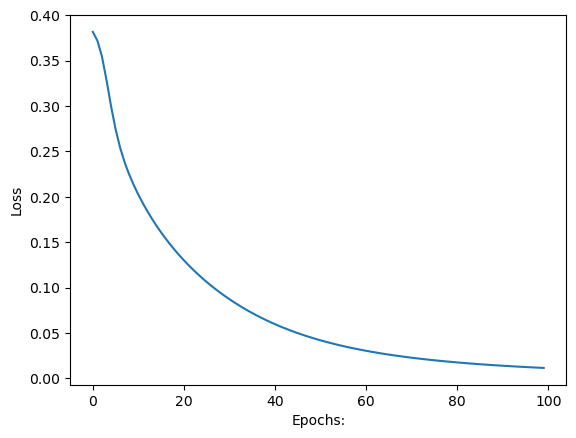

In [15]:
# Train the model
acc, loss_val, w1, w2 = train(x, y, w1, w2, 0.1, 100)
import matplotlib.pyplot as plt
plt.plot(loss_val)
plt.ylabel("Loss")
plt.xlabel("Epochs:")
plt.show()

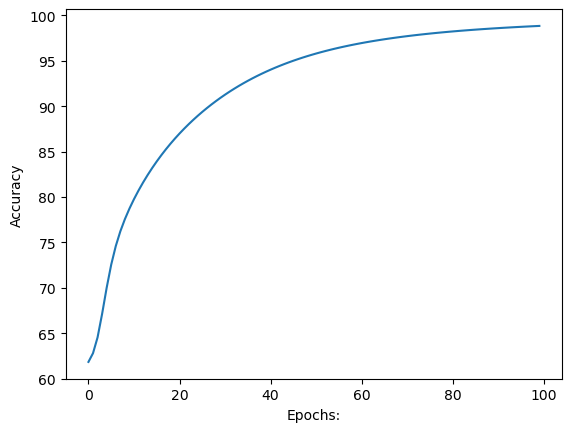

In [16]:
import matplotlib.pyplot as plt1
plt1.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs:")
plt.show()

C


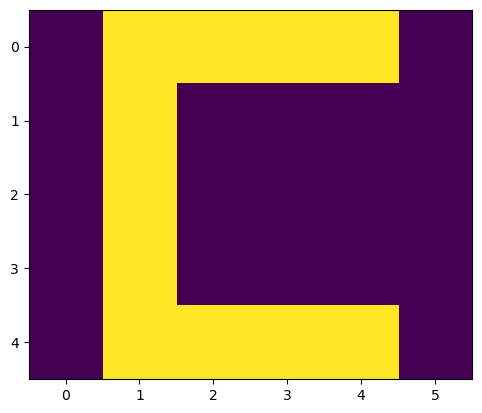

In [17]:
predict(x[2],w1,w2)